### Import all necessary files

In [1]:
import matplotlib.pyplot as plt

from tweets import *

### 0 Read earlier computed data

In [2]:
# Read choosen dataset and go straight to -> 4 Results <-
# dataset = ['dbscan_11x50.data', 'tidbscan_11x50.data', 'tidbscan_11xall.data']
# test_method = True
#
# d = read_computed_data(dataset[1])
# tweets, class_vector, tweet_vector, results, epsilon_start, epsilon_end, n, distances = d

### 1 Get vectors from table of tweets

In [3]:
# DBSCAN set True, TIDBSCAN set False
test_method = False
# tweets = read_all_tweets(DATA)
tweets, class_vector = read_n_tweets_from_data(DATA, 50) # Provide number of tweets per account
tweet_vector = np.array(get_vectors(tweets))

### 2 Find out epsilon
Find out epsilon by looking at distribution of max, min, median euclidean distances between all points.

In [4]:
%%time
distances = None
# distances = create_and_save_distances_list(tweet_vector, save=False) # Compute distances
# # distances = read_distances_list() # Read previously computed distances
# minimum, median, maximum = get_basic_statistics(distances)
# plot_basic_statistics(minimum, median, maximum)

CPU times: user 0 ns, sys: 12 µs, total: 12 µs
Wall time: 22.6 µs


### 3 Group vectors for multiple epsilon
Now after analyzing distribution of distances between points
do clustering n times for epsilon_start and delta_epsilon parameters

In [5]:
%%time
n = 15
epsilon_start = 0.65
epsilon_end = 1.2

if test_method:
    results = get_results_for_multiple_eps_not_our_implementation(tweet_vector, epsilon_start, epsilon_end, n)
else:
    results = get_results_for_multiple_eps(tweet_vector, epsilon_start, epsilon_end, n)

CPU times: user 24min 3s, sys: 71.8 ms, total: 24min 3s
Wall time: 24min 8s


### 4 Results

Create dataframe from results to visualise it

In [6]:
data = [tweets, class_vector, tweet_vector, results, epsilon_start, epsilon_end, n, distances]
path = 'dump/dbscan_11x50.data'
save_data(data,path)

In [7]:
%%time
if test_method:
    df = get_df_for_test_results(results, class_vector, epsilon_start, epsilon_end, n)
else:
    df = get_df_for_results(results, class_vector, epsilon_start, epsilon_end, n)

CPU times: user 559 ms, sys: 2.99 ms, total: 562 ms
Wall time: 562 ms


### Visualisation
Plot all clusture for diffrent sigma

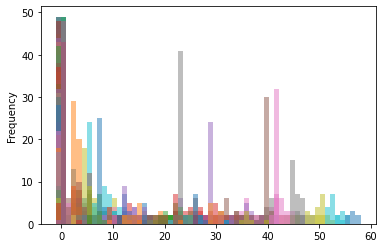

CPU times: user 17 s, sys: 93.7 ms, total: 17.1 s
Wall time: 17.2 s


In [8]:
%%time
ax = df.plot.hist(bins=60, alpha=0.5, legend=False)
ax.plot()
plt.show()

In [9]:
%%time
#a = df.hist(bins=60, alpha=1, legend=False, figsize=(60,n*4), layout=(n,11))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs


### Clustering evaluation


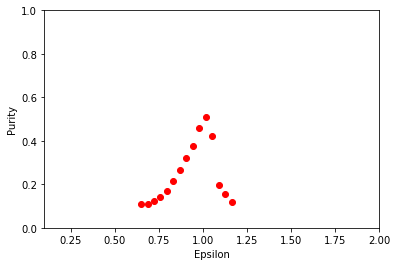

Max purity score is P=0.512, for epsilon=1.0166666666666666. 


In [10]:
if test_method:
    sc = get_purity_for_n_results_dbscan(class_vector, results, len(results))
else:
    sc = get_purity_for_n_results_tidbscan(class_vector, results, len(results))

epsilons = get_epsilon_array(epsilon_start, epsilon_end, n)


plt.plot(epsilons, sc, 'ro')
plt.axis([0.1, 2, 0, 1])
plt.xlabel("Epsilon")
plt.ylabel("Purity")
plt.show()

max_purity=max(sc)
eps_for_max_purity=epsilons[sc.index(max_purity)]
print("Max purity score is P={}, for epsilon={}. ".format(round(max_purity,3), eps_for_max_purity))

In [78]:
gr = get_all_groups_in_result(results, sc.index(max_purity), tweets)
[group_id,number_of_points,indexes_of_points,list_of_tweets, stats,  points] = gr

60 60 60 60


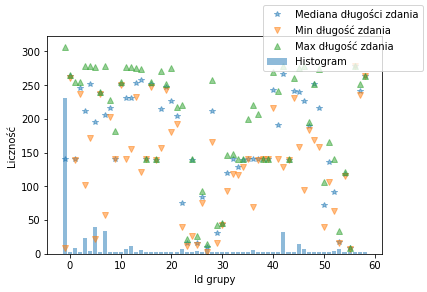

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(group_id, stats["med_sent_length"],'*', alpha=0.5)
ax.bar(group_id, number_of_points, alpha=0.5)
ax.plot(group_id, stats["min_sent_length"],'v', alpha=0.5)
ax.plot(group_id, stats["max_sent_length"],'^', alpha=0.5)
ax.set_xlabel("Id grupy")
ax.set_ylabel("Liczność")
fig.legend(["Mediana długości zdania", "Min długość zdania","Max długość zdania","Histogram"])
fig.savefig('filename.png', dpi=900)
plt.show()